In [1]:
cd ../..

/Users/jorothygong/Desktop/mousestyles


In [2]:
import mousestyles.data as data
import mousestyles.ultradian as ultradian
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import statsmodels.api as sm

In [4]:
plt.style.use('seaborn-whitegrid')

In [5]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [6]:
all_features = data.load_all_features()
all_features

,strain,mouse,day,hour,ASProbability,ASNumbers,ASDurations,Food,Water,Distance,ASFoodIntensity,ASWaterIntensity,MoveASIntensity
0,0,0,5,0,0.260422,1,31.250667,0.252970,0.330341,28.622813,0.134915,0.176178,0.014576
1,0,0,6,0,0.118975,1,16.490667,0.250952,0.269551,10.013321,0.292956,0.314669,0.011087
2,0,0,7,0,0.111603,1,13.392333,0.198600,0.225153,7.052784,0.247156,0.280202,0.007578
3,0,0,8,0,0.146633,1,17.596000,0.293873,0.207443,12.600482,0.278352,0.196487,0.010888
4,0,0,9,0,0.058850,1,7.127000,0.208126,0.197245,3.310738,0.491188,0.465508,0.006085
5,0,0,10,0,0.089600,1,10.752000,0.147975,0.105865,4.978508,0.229375,0.164101,0.006239
6,0,0,11,0,0.060989,1,13.956000,0.326313,0.000000,4.028878,0.743108,0.000000,0.007190
7,0,0,12,0,0.000000,0,0.000000,0.000000,0.000000,0.259767,0.000000,0.000000,0.000000
8,0,0,13,0,0.023039,2,21.027000,0.155196,0.000000,2.192808,0.935592,0.000000,0.004523
9,0,0,14,0,0.147817,1,17.738000,0.183752,0.191435,11.346755,0.172653,0.179873,0.009880


In [ ]:
# 11 bin * 12 days = 132 
# time series length = 132
sum = 0
for i in range(0, 16):
    sum += max(all_features.loc[all_features.loc[:, "strain"]==i, "mouse"]) + 1
    for j in range(int(max(all_features.loc[all_features.loc[:, "strain"]==i, "mouse"]))):
        if len(all_features.loc[(all_features.loc[:, "strain"] == i) & \
                 (all_features.loc[:, "mouse"] == j), :]) != 132:
            print("strain", i, "mouse", j)
            print(len(all_features.loc[(all_features.loc[:, "strain"] == i) & \
                 (all_features.loc[:, "mouse"] == j), :]))

In [7]:
min_30_strain0_mouse0 = ultradian.aggegate_interval(strain = 1, mouse = 0, 
                                                    feature = "W", bin_width = 20)

/Users/jorothygong/Desktop/mousestyles/mousestyles/data/__init__.py:126: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  dt = dt.sort(["strain", "mouse", "day"])


In [8]:
# min_30_strain0_mouse0.loc[:,"F"].values

/Users/jorothygong/anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


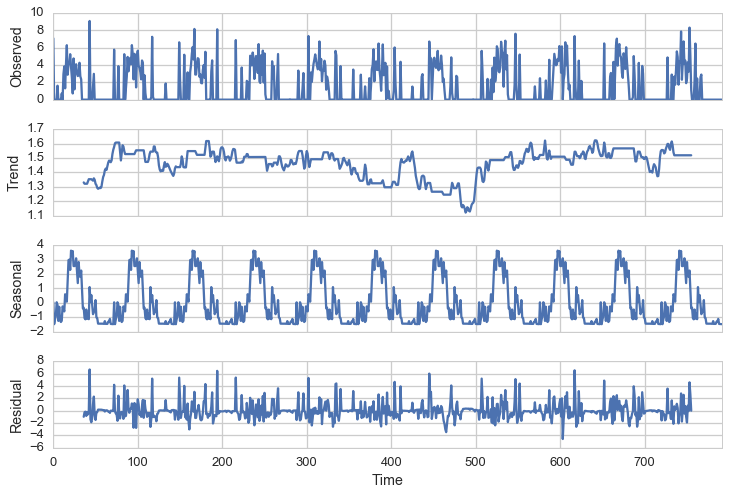

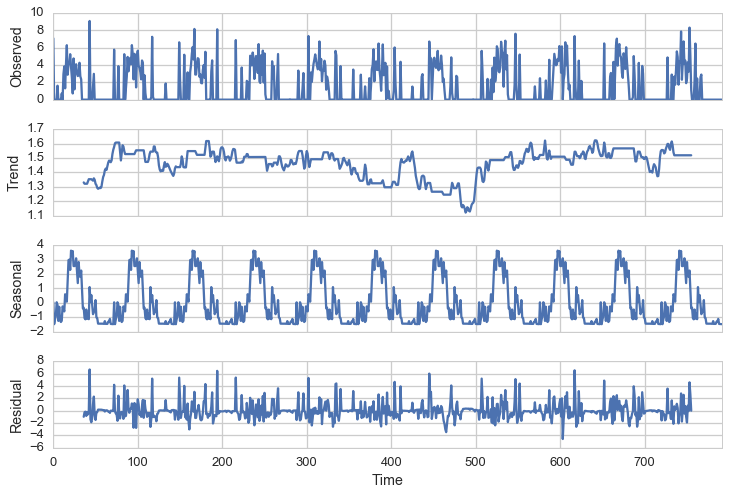

In [9]:
res = sm.tsa.seasonal_decompose(min_30_strain0_mouse0.loc[:,"W"].values, 
                                freq=72, model="additive")
res.plot()

In [ ]:
plt.plot(res.seasonal[0:71])

In [ ]:
test = all_features.loc[(all_features.loc[:, "strain"] == 0) & \
                 (all_features.loc[:, "mouse"] == 0),:]
test = test.sort_values(by=['day', 'hour'], ascending=[1, 1])
test = test.loc[:,"Food"]
test = test.reset_index().loc[:, "Food"]

In [ ]:
# ts = pd.DataFrame(test.values, index=pd.date_range('2014-1-1', periods=132, freq='2h'))
# ts.plot()
# ts.columns = ['Food']

In [ ]:
res = sm.tsa.seasonal_decompose(test.values, freq=11, model='additive')
res.plot()

In [ ]:
plt.plot(res.seasonal[0:47])

In [ ]:
intervals = data.load_intervals('F')
# {"AS", "F", "IS", "M_AS", "M_IS", "W"}

In [ ]:
intervals

In [ ]:
movement = data.load_movement(0, 0, 0)

In [ ]:
movement.head()